## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results_path, mouse_metadata_path, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# study_results_path

In [12]:
# mouse_metadata_path

In [14]:
# combined_data = pd.merge(study_results_path, mouse_metadata_path, how = "outer", on = "Mouse ID")
# combined_data

In [18]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].count()
mice_count

1893

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID"])]
all_duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates("Mouse ID")
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [35]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
dtype: int64

## Summary Statistics

In [359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standerd Deviation": sd, "SEM":sem})
summary_df


,Mean,Median,Variance,Standerd Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# i think i already did this above

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Count of Drug Regimens'}, xlabel='Drugs', ylabel='Total Count'>

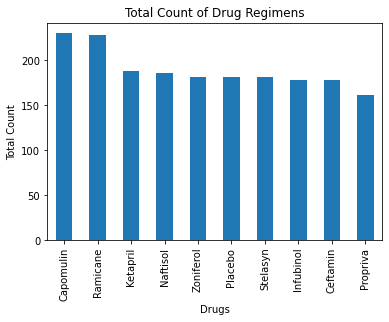

In [371]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total = combined_data["Drug Regimen"].value_counts()
drug_regimen = total.plot.bar()
plt.title("Total Count of Drug Regimens")
plt.xlabel("Drugs")
plt.ylabel("Total Count")

drug_regimen

In [143]:
drug_list = summary_df.index.tolist()
list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

Text(0, 0.5, 'Total Count')

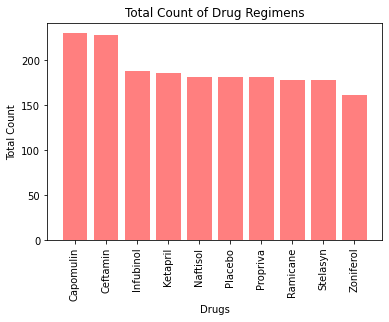

In [372]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total = combined_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(total))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,total, color='r', alpha=0.5, align="center")
plt.xticks( tick_locations, drug_list, rotation = 90)
plt.title("Total Count of Drug Regimens")
plt.xlabel("Drugs")
plt.ylabel("Total Count")


In [136]:
gender_mice = pd.DataFrame(clean_data.groupby("Sex").count().reset_index())
gender_mice_ID = gender_mice[["Sex", "Mouse ID"]]
gender_mice_ID

,Sex,Mouse ID
0,Female,124
1,Male,125


Text(0, 0.5, '')

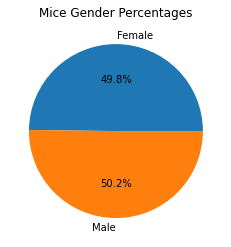

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice_ID.plot(kind = "pie", y = "Mouse ID", labels=gender_mice_ID["Sex"], autopct='%1.1f%%', title = "Mice Gender Percentages", legend = False)
plt.xlabel("")
plt.ylabel("")

In [235]:
sex = clean_data['Sex'].value_counts()
sex

Male      125
Female    124
Name: Sex, dtype: int64

In [232]:
labels = ["Females", "Males"]
colors = ["red", "pink"]
explode = (0.1, 0)

Text(0.5, 1.0, 'Male vs Female Mouse Population')

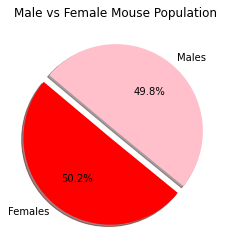

In [240]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow = True, startangle=140)
plt.title('Male vs Female Mouse Population')

## Quartiles, Outliers and Boxplots

In [362]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(clean_data.groupby("Mouse ID")["Timepoint"].max())

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_great_tp = pd.merge(clean_data, max_tp, on="Mouse ID")
merge_rename = merge_great_tp.rename(columns={"Timepoint_y":"Max Timepoint",
                               "Timepoint_x":"Timepoint"})

merge_rename

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,0
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,0
3,a457,0,45.0,0,Ketapril,Female,11,30,0
4,c819,0,45.0,0,Ketapril,Male,21,25,0
...,...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17,0
245,i557,0,45.0,0,Capomulin,Female,1,24,0
246,m957,0,45.0,0,Capomulin,Female,3,19,0
247,f966,0,45.0,0,Capomulin,Male,16,17,0


In [363]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments :
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    drug_tumor = merge_rename.loc[merge_rename["Drug Regimen"] == treatment]
    
    # add subset 
    tumor_volumes = drug_tumor.loc[drug_tumor['Timepoint'] == drug_tumor["Max Timepoint"]]
    values = tumor_volumes["Tumor Volume (mm3)"]
    
    tumor_data.append(values)
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = values.loc[(tumor_volumes['Tumor Volume (mm3)'] < lower_bound) | (tumor_volumes['Tumor Volume (mm3)'] > upper_bound)]
   
    print(f'{treatment} IQR is {iqr}')
    print(f'Lower Bound for {treatment} : {lower_bound}')
    print(f'Upper Bound for {treatment} : {upper_bound}')
    print(f'{treatment} outliers: {outlier}')
    

Capomulin IQR is 0.0
Lower Bound for Capomulin : 45.0
Upper Bound for Capomulin : 45.0
Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane IQR is 0.0
Lower Bound for Ramicane : 45.0
Upper Bound for Ramicane : 45.0
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol IQR is 0.0
Lower Bound for Infubinol : 45.0
Upper Bound for Infubinol : 45.0
Infubinol outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin IQR is 0.0
Lower Bound for Ceftamin : 45.0
Upper Bound for Ceftamin : 45.0
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [367]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# plt.boxplot(tumor_volumes)
# plt.title('Tumor Volume by Drug')
# plt.ylabel('Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

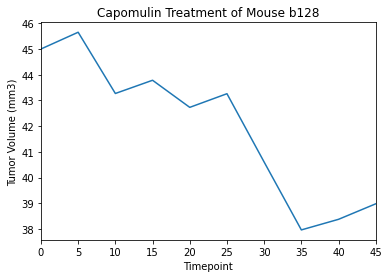

In [366]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "b128"]
x_axis_TP = capomulin_mouse["Timepoint"]
tumor_vol = capomulin_mouse["Tumor Volume (mm3)"]
plt.xlim(0, 45)
plt.plot(x_axis_TP, tumor_vol)
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0.5, 1.0, 'Average Tumor Volume by Mouse Weight')

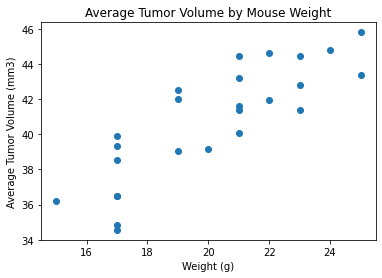

In [204]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")

## Correlation and Regression

The correlation between both factors is 0.84


Text(20, 35, 'y = 0.95x + 21.55')

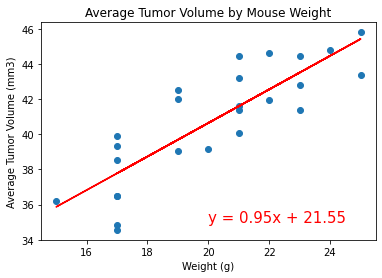

In [226]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
correlation = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_avg, tumor_avg )
regress_values = weight_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight_avg,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")